# L1 Penalty and Sparsity in Logistic Regression 

We classify 8*8 images of digits into two classes: 0-4, 5-9.

This example shows that different **C(Inverse of regularization strength 正则化强度)** for diffenent model(L1,L2,Elastic)

- C↓，Regularizaion ↑ 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [7]:

X, y = datasets.load_digits(return_X_y=True)

In [8]:
X = StandardScaler().fit_transform(X)

In [9]:
y = (y>4).astype(int)

In [12]:
l1_ratio = 0.5

C=1.00
Sparsity with L1 penalty: 0.06
Sparsity with L2 penalty: 0.05
Sparsity with EN penalty: 0.05
Score with L1 penalty: 0.90
Score with L2 penalty: 0.90
Score with EN penalty: 0.90
C=0.10
Sparsity with L1 penalty: 0.30
Sparsity with L2 penalty: 0.05
Sparsity with EN penalty: 0.11
Score with L1 penalty: 0.90
Score with L2 penalty: 0.90
Score with EN penalty: 0.90
C=0.01
Sparsity with L1 penalty: 0.84
Sparsity with L2 penalty: 0.05
Sparsity with EN penalty: 0.69
Score with L1 penalty: 0.86
Score with L2 penalty: 0.89
Score with EN penalty: 0.88


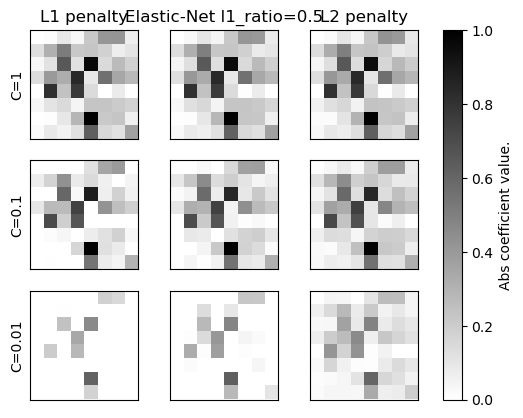

In [52]:
fig,axes = plt.subplots(3,3)
# 创建一个全局的颜色映射
vmin, vmax = 0, 1  # 设定 colorbar 的范围
sm = plt.cm.ScalarMappable(cmap="binary", norm=plt.Normalize(vmin=vmin, vmax=vmax))

for i, (C,axes_row) in enumerate(zip((1,0.1,0.01), axes)):
    clf_l1_LR = LogisticRegression(C=C,penalty='l1',tol=0.01,solver='saga')
    clf_l2_LR = LogisticRegression(C=C,penalty='l2',tol=0.01,solver='saga')
    clf_en_LR = LogisticRegression(C=C,penalty='elasticnet',l1_ratio=l1_ratio,
                                   tol=0.01,solver='saga')
    clf_l1_LR.fit(X,y)
    clf_l2_LR.fit(X,y)
    clf_en_LR.fit(X,y)
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # Sparity ratio 
    print(f"C={C:.2f}") 
    print(f"Sparsity with L1 penalty: {np.mean(coef_l1_LR==0):.2f}")
    print(f"Sparsity with L2 penalty: {np.mean(coef_l2_LR==0):.2f}")
    print(f"Sparsity with EN penalty: {np.mean(coef_en_LR==0):.2f}")
    # accuracy
    print(f"Score with L1 penalty: {clf_l1_LR.score(X,y):.2f}")
    print(f"Score with L2 penalty: {clf_l2_LR.score(X,y):.2f}")
    print(f"Score with EN penalty: {clf_en_LR.score(X,y):.2f}")
    # plot
    if i==0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title(f"Elastic-Net l1_ratio={l1_ratio}")
        axes_row[2].set_title('L2 penalty')
    for ax,coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8,8)),
            vmin = vmin,
            vmax=vmax,
            cmap='binary'
        )
        ax.set_xticks(())
        ax.set_yticks(())
        
    axes_row[0].set_ylabel(f"C={C}")
cbar = fig.colorbar(sm,ax=axes.ravel())
cbar.set_label("Abs coefficient value.")


📊
- the stronger is regularization, the sparser is $w$
- L1 has more sparse ratio. When C=0.01, L1 sparsity ratio is **90%**! Only **1/7** features are useful!
- Even sparsity is 80%, accuracy is 86%! **SO SPARSE!**